In [55]:
import pandas as pd

ruta = 'SYB66_246_202310_Population Growth, Fertility and Mortality Indicators.csv'
data = pd.read_csv(ruta, encoding='Windows-1252', skiprows=1, 
                   names=['Region/Country/Area', 'Zone', 'Year', 'Series', 'Value', 'Footnotes', 'Source'])

print("Datos cargados correctamente:")
print(data.head())

data_2020_clean = data[data['Year'] == 2020][['Region/Country/Area', 'Series', 'Value']].dropna()

print("\nDatos limpios para el año 2020:")
print(data_2020_clean.head())

Datos cargados correctamente:
   Region/Country/Area                           Zone  Year  \
0  Region/Country/Area                            NaN  Year   
1                    1  Total, all countries or areas  2010   
2                    1  Total, all countries or areas  2010   
3                    1  Total, all countries or areas  2010   
4                    1  Total, all countries or areas  2010   

                                              Series  Value  Footnotes  \
0                                             Series  Value  Footnotes   
1       Population annual rate of increase (percent)    1.3        NaN   
2          Total fertility rate (children per women)    2.6        NaN   
3  Infant mortality for both sexes (per 1,000 liv...   37.1        NaN   
4  Maternal mortality ratio (deaths per 100,000 p...    254        NaN   

                                              Source  
0                                             Source  
1  United Nations Population Divisio

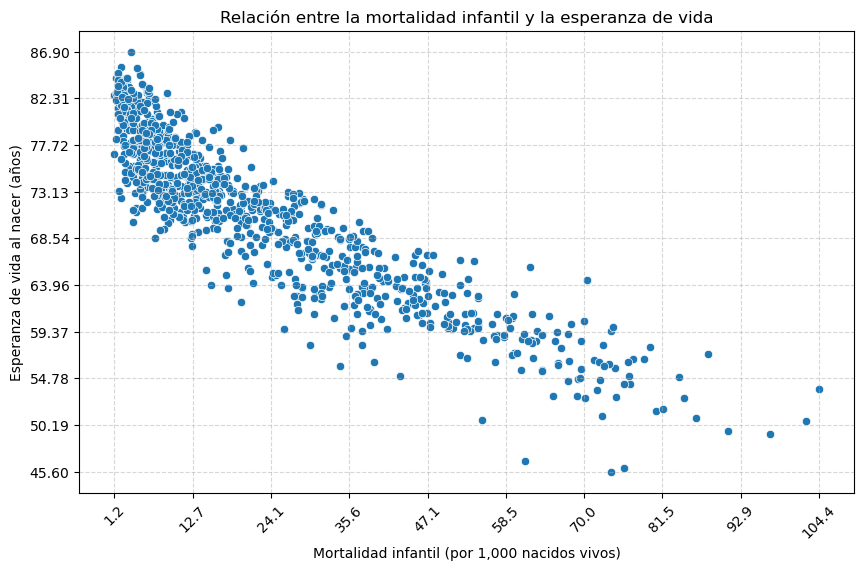

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

infant_mortality = df[df['Series'] == 'Infant mortality for both sexes (per 1,000 live births)'].copy()
life_expectancy = df[df['Series'] == 'Life expectancy at birth for both sexes (years)'].copy()

infant_mortality['Value'] = pd.to_numeric(infant_mortality['Value'], errors='coerce')
life_expectancy['Value'] = pd.to_numeric(life_expectancy['Value'], errors='coerce')

infant_mortality.rename(columns={'Value': 'Infant_Mortality'}, inplace=True)
life_expectancy.rename(columns={'Value': 'Life_Expectancy'}, inplace=True)

combined_df = pd.merge(infant_mortality, life_expectancy, on=['Region/Country/Area', 'Year'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Infant_Mortality', y='Life_Expectancy', data=combined_df)

plt.xticks(np.linspace(combined_df['Infant_Mortality'].min(), combined_df['Infant_Mortality'].max(), 10), rotation=45)
plt.yticks(np.linspace(combined_df['Life_Expectancy'].min(), combined_df['Life_Expectancy'].max(), 10))

plt.title('Relación entre la mortalidad infantil y la esperanza de vida')
plt.xlabel('Mortalidad infantil (por 1,000 nacidos vivos)')
plt.ylabel('Esperanza de vida al nacer (años)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

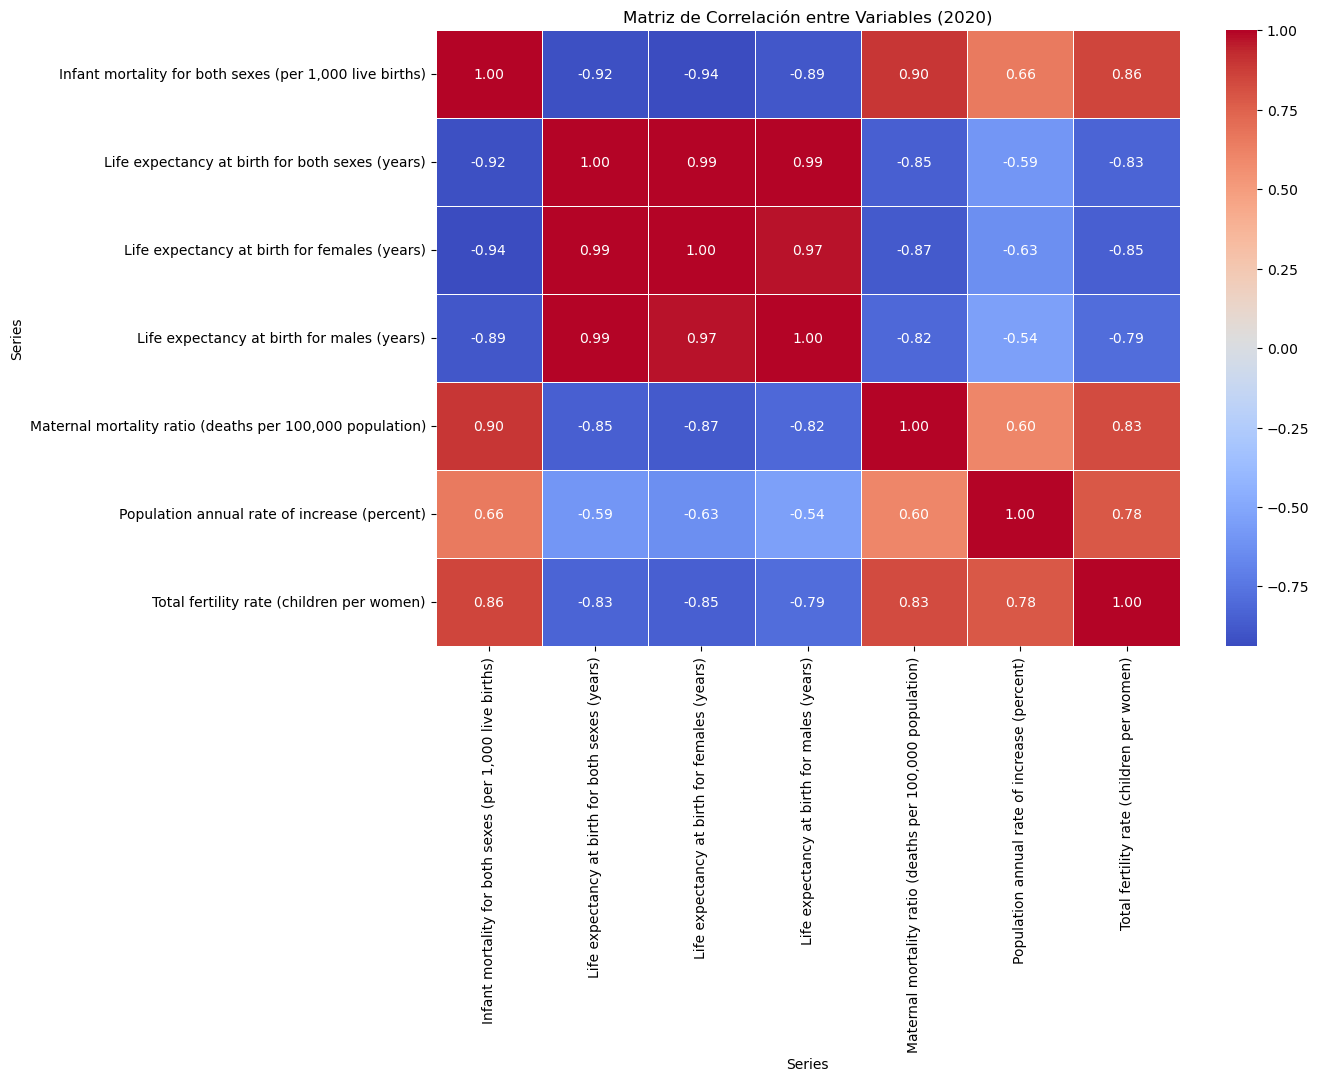

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calcular_correlaciones(df):
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

    df_pivot = df.pivot_table(index='Region/Country/Area', columns='Series', values='Value', aggfunc='mean')

    df_pivot = df_pivot.dropna()

    corr_matrix = df_pivot.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación entre Variables (2020)")
    plt.show()

calcular_correlaciones(df)